JMJ+

### Problem Definition:

* Use the collected data from the patient-level, to generate meaningful and workable insights

* Utilize these understandings to improve the diagnosis, and thereby to provide better treatment 

* Help the firm to understand key factors that contribute to the hospitalization charge.

## Table of Contents

1. **[Import libraries](#import_lib)**
2. **[Read data & basic Checks](#Read_Data)**
    - 2.1 - [Observations from basic checks](#obs_basic)
3. **[Statistical summary](#Stat_smr)**
4. **[Outlier detection using box plot](#box_plt)**
5. **[Univariate Analysis](#uni_ana)**
6. **[Bivariate Analysis](#bi_ana)** 
7. **[Checking the correlation](#co_rel)** 
    - 7.1 - [Observation from the heatmap](#obs_heatmap)
8. **[Hypothesis Testing](#H_tst)**
    - 8.1 - [Prove (or disprove) that the hospitalization charges of people who do smoking are greater than those who don't](#H_1)
    - 8.2 - [Prove (or disprove) with statistical evidence that the viral load of females is different from that of males](#H_2)
    - 8.3 - [Is the proportion of smoking significantly different across different regions?](#H_3)
    - 8.4 - [Is the mean viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level the same?](#H_4)
9. **[Insights & Recommendations](#ins_rec)**

### 1. Import libraries <a id='import_lib'></a>  

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import (chi2_contingency,shapiro,levene,f_oneway)
# from scipy.stats import shapiro

import warnings
warnings.filterwarnings('ignore')

### 2. Read data & basic Checks <a id='Read_Data'></a>  

In [2]:
local_path=r'C:\Users\Alfred Paul\OneDrive\Desktop\Scaler_CaseStudies\Dataset\JMJ_scaler_apollo_hospitals.csv'

df=pd.read_csv(local_path)

### Basic Analysis:

In [3]:
df.head(3)

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,0,19,female,yes,southwest,9.30,0,42212
1,1,18,male,no,southeast,11.26,1,4314
2,2,28,male,no,southeast,11.00,3,11124


In [4]:
# Creating a copy:

df_orginal=df.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1338 non-null   int64  
 1   age                      1338 non-null   int64  
 2   sex                      1338 non-null   object 
 3   smoker                   1338 non-null   object 
 4   region                   1338 non-null   object 
 5   viral load               1338 non-null   float64
 6   severity level           1338 non-null   int64  
 7   hospitalization charges  1338 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 83.8+ KB


In [6]:
# Checking the shape:

df.shape

(1338, 8)

In [7]:
# Checking for null values:

df.isna().sum()

Unnamed: 0                 0
age                        0
sex                        0
smoker                     0
region                     0
viral load                 0
severity level             0
hospitalization charges    0
dtype: int64

#### Observations from basic checks <a id='obs_basic'></a>

1. Number of (rows,columns) : (1338, 8)

2. Count of null values: 0

3. Data types are either of int,object and float values

4. Missing value treatment is not required as there are no null values.

### 3. Statistical summary: <a id='Stat_smr'></a> 

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1338.0,668.500000,386.391641,0.00,334.2500,668.50,1002.7500,1337.00
age,1338.0,39.207025,14.049960,18.00,27.0000,39.00,51.0000,64.00
viral load,1338.0,10.221233,2.032796,5.32,8.7625,10.13,11.5675,17.71
severity level,1338.0,1.094918,1.205493,0.00,0.0000,1.00,2.0000,5.00
hospitalization charges,1338.0,33176.058296,30275.029296,2805.00,11851.0000,23455.00,41599.5000,159426.00


In [9]:
df.describe(include='object').transpose()

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


### 4. Outlier detection using box plot: <a id='box_plt'></a> 

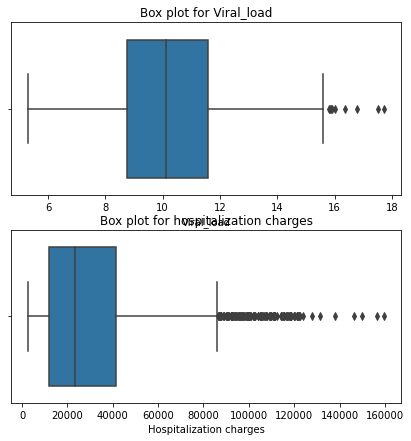

In [10]:
# Box plot for 'viral load' and 'hospitalization charges':

fig=plt.figure(figsize=(7,7))

# Viral_load
ax1=fig.add_subplot(2,1,1)
ax1=sns.boxplot(x='viral load',data=df)
ax1.set_xlabel('Viral_load')
ax1.set_title('Box plot for Viral_load')

# hospitalization charges
ax1=fig.add_subplot(2,1,2)
ax1=sns.boxplot(x='hospitalization charges',data=df)
ax1.set_xlabel('Hospitalization charges')
ax1.set_title('Box plot for hospitalization charges')

plt.show()

##### Observations from box plot:

* Outliers in the case of 'viral load' is negligible, whereas large number of outliers can be seen in the case of hospitalization charge

In [11]:
# Outlier removal using IQR:

q1=df['hospitalization charges'].quantile(0.25)
q3=df['hospitalization charges'].quantile(0.75)

iqr=q3-q1

df_iqr=df[(df['hospitalization charges']>(q1-(1.5*iqr))) & 
          (df['hospitalization charges']<(q3+(1.5*iqr)))]

df_iqr.shape,df.shape

# Dropping 'Unnamed: 0'
df1=df_iqr.copy()
df1.drop(columns=['Unnamed: 0'],inplace=True)

### 5. Univariate Analysis: <a id='uni_ana'></a>

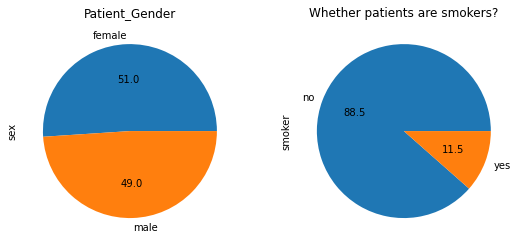

In [12]:
# Pie chart to study 'sex' and 'smoker':

fig,axs=plt.subplots(ncols=2,figsize=(9,4))

df1['sex'].value_counts().plot(kind='pie',autopct='%.1f',ax=axs[0],title='Patient_Gender')
df1['smoker'].value_counts().plot(kind='pie',autopct='%.1f',ax=axs[1],
                                  title='Whether patients are smokers?')

plt.show()

##### Analysis:

1. Both the gender have almost similar representation 

2. Vast majority of the patients are non smokers

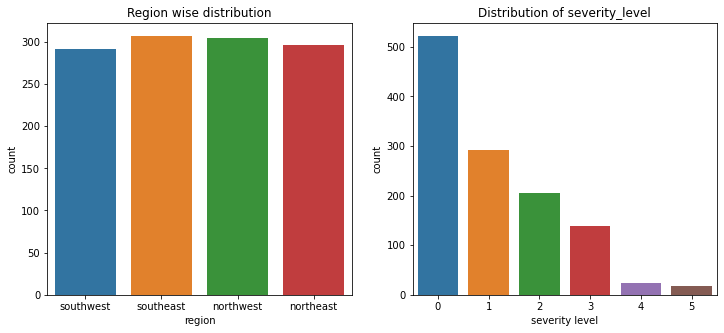

In [13]:
# Studying 'region' and 'severity level'

fig,axs=plt.subplots(ncols=2,figsize=(12,5))

sns.countplot(x='region',data=df1, ax=axs[0]).set_title('Region wise distribution')
sns.countplot(x='severity level',data=df1, ax=axs[1]).set_title('Distribution of severity_level')

plt.show()

##### Analysis of 'region' and 'severity level':

1. All the regions have near equal patient admits

2. Most of the cases comes below severity level 3, with severity level 0, topping the list


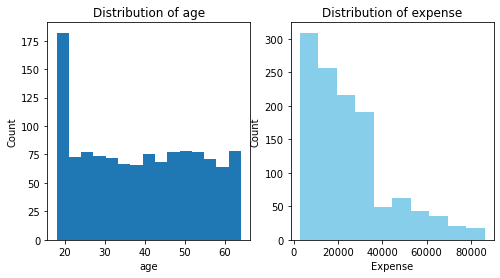

In [14]:
fig = plt.figure(figsize=(8,4))

ax1 = fig.add_subplot(1,2,1)
ax1=df1['age'].plot(kind='hist', bins=15,title='Distribution of age')
ax1.set_xlabel('age')
ax1.set_ylabel('Count')

ax2=fig.add_subplot(1,2,2)
ax2=df1['hospitalization charges'].plot(kind='hist',title='Distribution of expense',color='skyblue')
ax2.set_xlabel('Expense')
ax2.set_ylabel('Count')                                  
                               
plt.show()

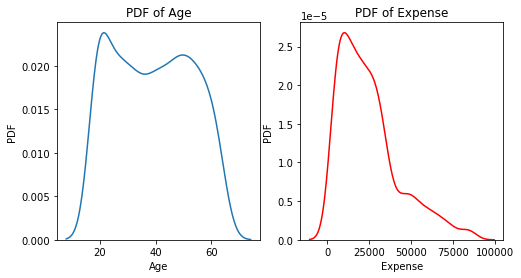

In [15]:
# PDF of 'age' & 'hospitalization charges':

fig = plt.figure(figsize=(8,4))

# 'age'
ax1 = fig.add_subplot(1,2,1)
ax1=sns.distplot(x=df1['age'],hist=False,kde=True)
ax1.set_xlabel('Age')
ax1.set_ylabel('PDF')
ax1.set_title('PDF of Age')

# 'hospitalization charges'
ax1 = fig.add_subplot(1,2,2)
ax1=sns.distplot(x=df1['hospitalization charges'],hist=False,kde=True,color='r')
ax1.set_xlabel('Expense')
ax1.set_ylabel('PDF')
ax1.set_title('PDF of Expense')

plt.show()

### Analysis of 'age' and 'hospitalization charges':

1. Intrestingly, younger age groups(age~20) has the highest cases and age>=60 has a marked rise compared to other ages.

2. Most of the hospital expense is centered below Rs. 40,000.

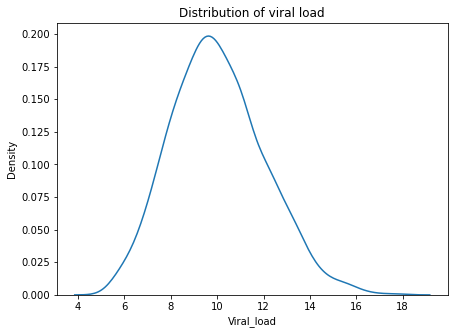

In [16]:
# Distribution of viral load:

plt.figure(figsize=(7,5))

sns.distplot(df1['viral load'],hist=False,kde=True)

plt.title('Distribution of viral load')
plt.xlabel('Viral_load')
plt.ylabel('Density')

plt.show()

##### Analysis of viral load:

1. The plot follows a near gaussian distribution.

2. The peak value can be observed at ~10 and the level is very less at either of the ends

### 6. Bivariate Analysis: <a id='bi_ana'></a>

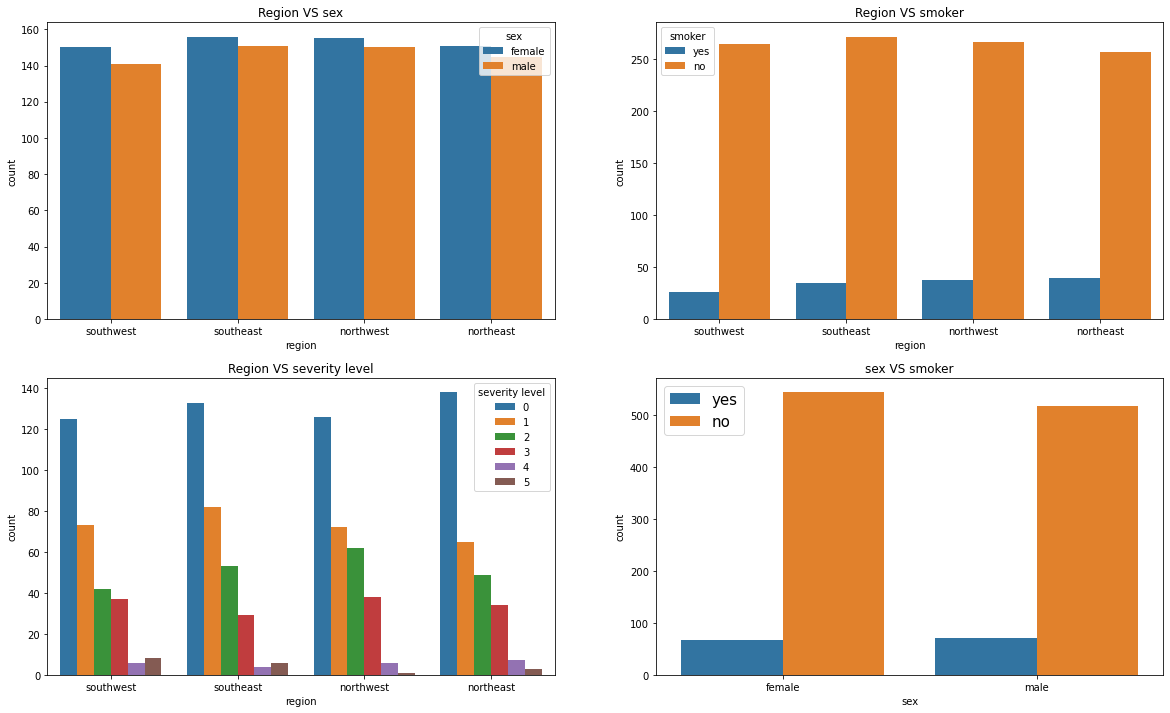

In [17]:
# Countplot:

# 1.'region','sex':
fig,axs=plt.subplots(ncols=2,nrows=2,figsize=(20,12))

sns.countplot(x='region',hue='sex',
              data=df1,ax=axs[0,0]).set_title('Region VS sex')

# 2. 'region','smoker'
sns.countplot(x='region',hue='smoker',
              data=df1,ax=axs[0,1]).set_title('Region VS smoker')

# 3. 'region','severity level'
sns.countplot(x='region',hue='severity level',
              data=df1,ax=axs[1,0]).set_title('Region VS severity level')

#4. 'sex' vs 'smoker'
sns.countplot(x='sex',hue='smoker',
              data=df1,ax=axs[1,1]).set_title('sex VS smoker')

plt.legend(prop={'size':15})

plt.show()                               
                                              
                                              


##### Observations:

1. In all the regions, male have slightly higher number of cases than female, and the pattern is almost similar in all the regions

2. Count of smokers is very less in all the regions and pattern is identical across the regions

3. Severity level '0' tops in all the regions, and higher severe cases decreases in a sequential manner across the regions

4. Smokers are present in both the genders and their count is significantly less compared to non smokers.

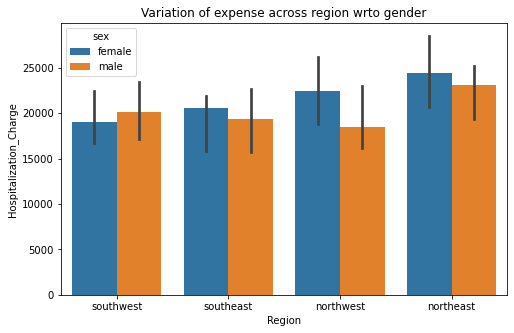

In [18]:
# Hospitalization charges across regions:

plt.figure(figsize=(8,5))
sns.barplot(y='hospitalization charges',x='region',hue='sex',data=df1,estimator = np.median)

plt.title('Variation of expense across region wrto gender')
plt.xlabel('Region')
plt.ylabel('Hospitalization_Charge')

plt.show()

##### Observation:

1. Except in southwest, in all the regions, females have slightly higher hospitalization charge compared to males

2. Northeast has the highest hospitalization charge while southwest has the lowest.

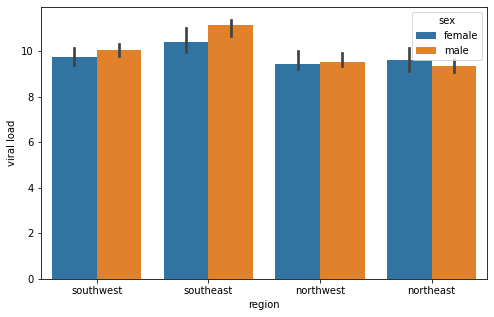

In [19]:
# Viral load across region:

plt.figure(figsize=(8,5))

sns.barplot(y='viral load',
            x='region',
            hue='sex',
            data=df1,
           estimator = np.median)

plt.show()


### Observations:
* Almost all the regions follow a very similar trend with respect to viral load
* Moreover, both the genders are equally affected by the infection

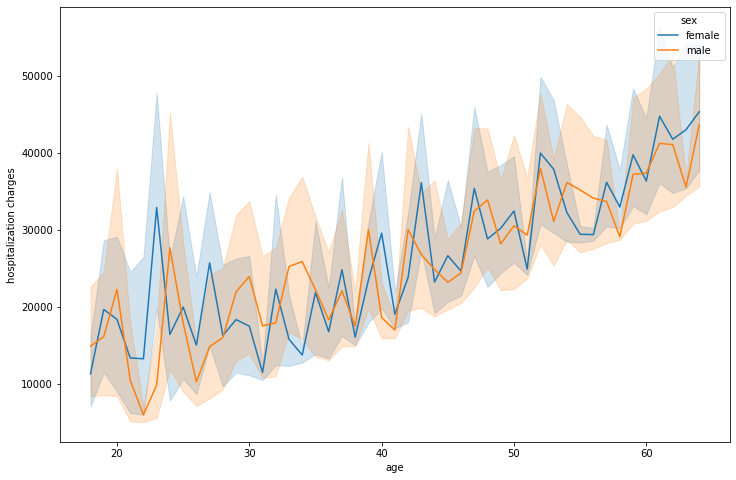

In [20]:
# Lineplot studying the hospitalization charge and age:

plt.figure(figsize=(12,8))
sns.lineplot(data=df1,x='age',y='hospitalization charges',hue='sex')
plt.show()

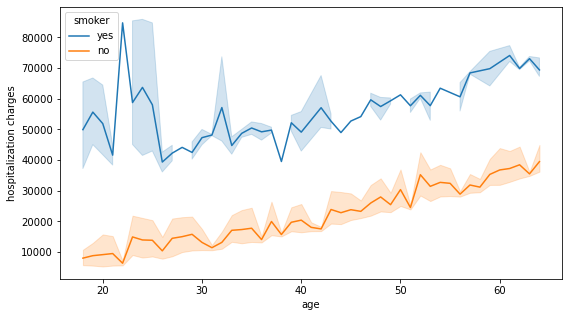

In [21]:
plt.figure(figsize=(9,5))
sns.lineplot(data=df1,x='age',y='hospitalization charges',hue='smoker')
plt.show()

- It can be seen that for both the genders, as the age increases, the hospitalization charge also follows a upward trend


In [22]:
# Creating the age bins

df['age_bins']=pd.cut(x=df['age'],bins=[0,18,28,38,48,58,68,100],
                      labels=['0-18','18-28','28-38','38-48','48-58','58-68','68-100'])

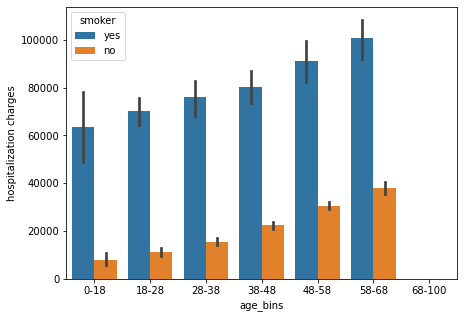

In [23]:
# Bar plot for hospitalization charges for different age groups:

plt.figure(figsize=(7,5))
sns.barplot(data=df,x='age_bins',y='hospitalization charges',hue='smoker')
plt.show()

#####  Observations from different age groups:

* Higher the age group, higher the expense

* Male patients have a slightly higher expense compared to female across all the age groups.

In [24]:
df.groupby(['region','sex','smoker']).median()['hospitalization charges'].unstack()

smoker                 no      yes
region    sex                     
northeast female  21703.0  55829.0
          male    20836.0  84983.5
northwest female  19330.0  72376.0
          male    16718.5  65273.0
southeast female  17617.0  87544.5
          male    15990.0  95707.0
southwest female  18370.0  85416.0
          male    18297.5  88964.0

### Observation:

- Hospitalization charge is higher for both the genders across all the regions

In [25]:
df.groupby(['region','sex','smoker']).median()['viral load'].unstack()

smoker                no     yes
region    sex                   
northeast female  10.040   8.420
          male     9.440  10.105
northwest female   9.910   9.440
          male     9.705   9.500
southeast female  10.740  10.580
          male    11.275  11.700
southwest female   9.870  10.430
          male    10.170  10.900

### 7. Checking the correlation <a id='co_rel'></a>

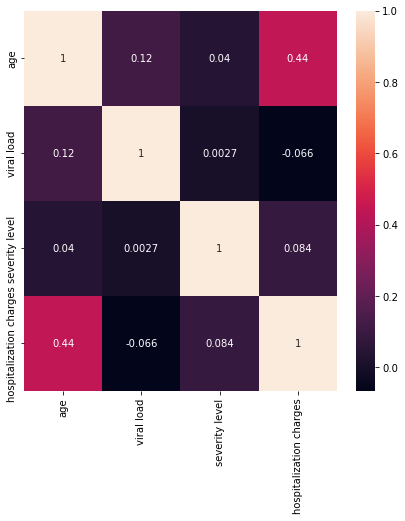

In [26]:
plt.figure(figsize=(7,7))
sns.heatmap(df1.corr(),annot=True)
plt.show()

### 7.1 Observation from the heatmap: <a id='obs_heatmap'></a>  

* Age has high correlation with hospitalization charge
* Hence effect of age on hospitalization charge should be studied in detail

---
### 8. Hypothesis Testing <a id='H_tst'></a> 

---
**8.1 Prove (or disprove) that the hospitalization charges of people who do smoking are greater than those who don't? <a id='H_1'></a>**

**Hypothesis formulation**

- Null hypothesis : μ1 <= μ2 : The average hospitalization charge of smokers is less than or equal to that of non smokers
    
- Alternate hypothesis : μ1 > μ2 : The average hospitalization charge of smokers is greater than that of non smokers
    
**Significance level**

- α = 0.05
    
**Test chosen**
- Since population std deviation is not known, **t - test** is opted
- Based on the Alternate hypothesis, it can be decided that **Right tailed t-test** is to be chosed
 

In [27]:
# Taking the sample for smoker and non smoker
smoker=df1[df1['smoker']=='yes']['hospitalization charges'].sample(120)
non_smoker=df1[df1['smoker']=='no']['hospitalization charges'].sample(120)

# Setting the alpha value
alpha=0.05

# Generating test statistic and p value
t_statistic, p_value = stats.ttest_ind(smoker, non_smoker,equal_var=False,alternative='greater',
                                      random_state=3)

p_value

2.363350693864539e-44

In [28]:
print("Since p value {} is less than alpha {}, the null hypothesis is rejected and alternate hypothesis is accepted.".format(p_value,alpha))

Since p value 2.363350693864539e-44 is less than alpha 0.05, the null hypothesis is rejected and alternate hypothesis is accepted.


**Conclusion**
>Average hospitalization charge for smoker is greater than non smoker

---
**8.2 Prove (or disprove) with statistical evidence that the viral load of females is different from that of males <a id='H_2'></a>**


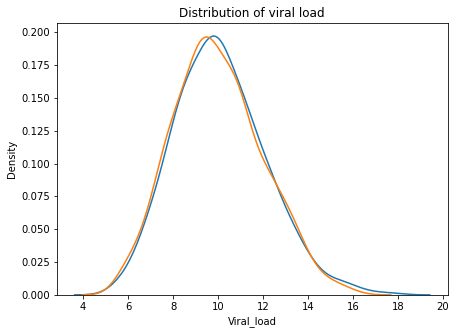

In [29]:
# Distribution of viral load for male and female:

plt.figure(figsize=(7,5))

# Extracting the male data
male=df1.loc[df1['sex']=='male']

# Extracting the female data
female=df1.loc[df1['sex']=='female']

# Plotting the data
sns.distplot(male['viral load'],hist=False,kde=True)
sns.distplot(female['viral load'],hist=False,kde=True)

plt.title('Distribution of viral load')
plt.xlabel('Viral_load')
plt.ylabel('Density')
# plt.legend()

plt.show()

**Visually it can be seen that, viral load is similar for both the genders. But it needs to be verified statistically as well**

**Hypothesis formulation**

- Null hypothesis : μ1 = μ2 : The average viral load of females is similar to that of males

- Alternate hypothesis : μ1 != μ2 : The average viral load of females is not similar to that of males

**Significance level**
"
- α = 0.05

**Test chosen**

- Since population std deviation is not known, t - test is opted

- Based on the Alternate hypothesis, it can be decided that **Two tailed t-test** is to be chosen

In [30]:
# Checking the statistical summary
df1.groupby('sex')['viral load'].describe()


,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,612.0,9.978186,1.981809,5.60,8.595,9.86,11.1875,16.02
male,587.0,10.087700,2.026193,5.32,8.610,9.94,11.3550,17.71


In [31]:
# Sampling the required data
m=df1[df1['sex']=='male']['viral load'].sample(120)
f=df1[df1['sex']=='female']['viral load'].sample(120)

# Performing the t test
alpha=0.05
t_statistic, p_value = stats.ttest_ind(m, f, alternative='two-sided')

# Printing the result
print("Test statistic = {} , Pvalue ={} ".format(t_statistic,p_value ))

print("Since p value {} is greater than alpha {}, the null hypothesis is accepted.".format(p_value,alpha))

Test statistic = 0.4582941537606754 , Pvalue =0.6471593038662098 
Since p value 0.6471593038662098 is greater than alpha 0.05, the null hypothesis is accepted.


**Conclusion:**
- The average viral load of females is similar to that of males

---
### 8.3 Is the proportion of smoking significantly different across different regions <a id='H_3'></a>?

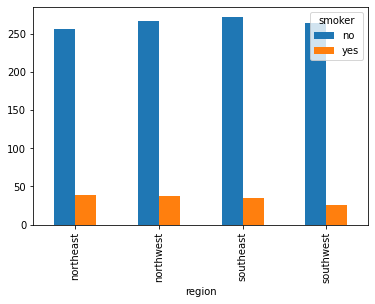

In [32]:
# Visual analysis

cont = df1.groupby(['region','smoker'])['age'].count().unstack()
cont.plot(kind='bar')
plt.show()

**Visual analysis conclusion**
- It can be noted that pattern of smoking is similar across the region

**Hypothesis formulation**

- Null hypothesis : Smokers proportions is NOT significantly different across different regions

- Alternate hypothesis : Smokers proportions is significantly different across different regions

**Significance level**

- α = 0.05

**Test chosen**

- Since comparison of 2 different categorical variables (smoker & region) are done, Chi-square test is done



In [33]:

# Creating contingency table
contigency= pd.crosstab(df1.region, df1.smoker)

# Setting the alpha value
alpha=0.05

# Using the chi2_contingency test
chi2, pval, dof, exp_freq = chi2_contingency(contigency, correction = False)
print('chi-square statistic: {} , Pvalue: {} , Degree of freedom: {} '.format(chi2,pval,dof))

chi-square statistic: 2.974562784179986 , Pvalue: 0.3955637450555718 , Degree of freedom: 3 


In [34]:
if(pval<alpha):
    print('Null hypothesis is rejected')
else:
    print('Null hypothesis is accepted')

Null hypothesis is accepted


**Conclusion**
- There is no significant relationship between location and smoking pattern

---

### 8.4 Is the mean viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level the same? <a id='H_4'></a>

**Hypothesis formulation**

- Null hypothesis : μ1 = μ2 = μ3: The mean viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level the same

- Alternate hypothesis : Atleast one of the mean viral load of women is not same
    
**Significance level**

- α = 0.05

**Test chosen**

- Since mean of 3 groups (or severity level) is compared, **One-Way ANOVA** is opted

In [35]:
# Doing the basic statisical checks

df1[df1['sex']=='female'].groupby(by='severity level')['viral load'].describe().head(3)

,count,mean,std,min,25%,50%,75%,max
severity level,,,,,,,,
0,269.0,9.967212,1.934359,5.76,8.61,9.70,11.13,14.92
1,147.0,9.908844,1.918987,5.60,8.60,9.67,11.13,15.36
2,107.0,10.001776,2.163643,5.73,8.36,10.07,11.24,16.02


In [36]:
# Extracting the female patients with severity level 0,1,2

df_female_severe=df1[df1['sex']=='female'].loc[df1[df1['sex']=='female']['severity level']<=2]
df_female_severe.head(3)

,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,19,female,yes,southwest,9.30,0,42212
5,31,female,no,southeast,8.58,0,9392
6,46,female,no,southeast,11.15,1,20601


<AxesSubplot:xlabel='severity level', ylabel='viral load'>

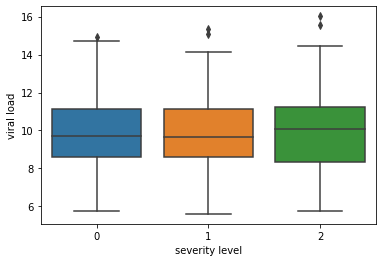

In [37]:
# Visual analysis to compare the severity level

sns.boxplot(x='severity level', y='viral load', data=df_female_severe)

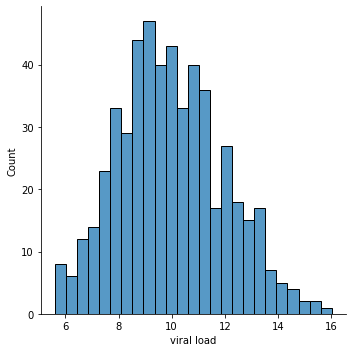

In [38]:
# Checking the distribution of viral load

sns.displot(df_female_severe['viral load'],bins=25)

**Conclusion from visual analysis**
- Mean viral load can be seen almost similar, across different severity level
<br>
- Viral load almost follows a normal distribution 

**Assumptions for ANOVA:1**
<br>
- Each group sample is drawn from a normally distributed population.
    - Normality check is done using **Shapiro-Wilk’s test**
<br>

**Shapiro-Wilk’s test**
<br>
- Null hypothesis : viral load follows normal distribution
- Alternate hypothesis : viral load does not follow normal distribution

In [39]:
# Shapiro-Wilk’s test

alpha=0.05

w, p_value = shapiro(df_female_severe['viral load'])

if(p_value<=alpha):
    print('Null hypothesis rejected')
else:
    print('Null hypothesis accepted')

Null hypothesis rejected


**Conclusion from Shapiro-Wilk’s test**
<br>
Alternate hypothesis is chosen based on the test, i.e, viral load doesnot follow normal distribution

---
**Assumptions for ANOVA:2**
<br>
- **All populations have a common variance.**
<br>
- This is achieved using **Levene’s test**
<br>
- **Levene's test is used to test if k samples have equal variances**


### Levene’s test

**Hypothesis formulation**
<br>
- Null hypothesis : All the viral load variances are equal

- Alternate hypothesis : Atleast one of the viral load variances are not equal
<br>
- **Significance level**
- α = 0.05

In [40]:
alpha=0.05

statistic, p_value = levene( df_female_severe[df_female_severe['severity level']==0]['viral load'].sample(100),
 df_female_severe[df_female_severe['severity level']==1]['viral load'].sample(100),
 df_female_severe[df_female_severe['severity level']==2]['viral load'].sample(100))

if(p_value<=alpha):
    print('Null hypothesis rejected')
else:
    print('Null hypothesis accepted')

Null hypothesis accepted


**Conclusion from Levene’s test**
<br>
- Alternate hypothesis is chosen based on the test, i.e, atleast one of the variance of the group is different

**Conclusion based on assumption checks:**
<br>
- Statistically, both the assumptions for performing ANOVA has not been achieved
- However, visually it can be concluded that variances are almost equal and the viral load nearly follows a normal distribution
- Based on these conclusions, ANOVA can be performed


In [41]:
# Performing one way ANOVA

alpha=0.05

statistic, p_value = f_oneway( df_female_severe[df_female_severe['severity level']==0]['viral load'].sample(100),
 df_female_severe[df_female_severe['severity level']==1]['viral load'].sample(100),
 df_female_severe[df_female_severe['severity level']==2]['viral load'].sample(100))

if(p_value<=alpha):
    print('Null hypothesis rejected')
else:
    print('Null hypothesis accepted')

Null hypothesis accepted


**Conclusion from ANOVA**
<br>
- **Null hypothesis is accepted** : The mean viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level the same
<br>
- The same conclusion can be drawn based on the box plot


---
### 9. Insights & Recommendations <a id='ins_rec'></a> 
<br>



**Insights**

1. Hospitalization charges of most of the patients are reasonable, and few of them account for high amount
2. There has been no particular association of region wrto severity/hospitalization charge, i.e. there is no evident regional trend
3. Less count of admitted patients have very severe medical condition 
4. Proportion of smokers is less compared to the non smokers
5. Age and smoking habit has strong association with hospitalization charge
6. Viral load is gender independent (similar in both the genders)
7. There is no association of smoking with the region of the patients


**Recommendations**
<br>
1. Observing the trend of smokers, some form of de-addiction treatment option can be also provided to such patients. Attractive offers can be provided, which can be availed during the ongoing treatment
2. Since the lower severity viral load tend to be similar (based on the statistical analysis), similar treatment of low dosage treatment is required for patients with severity level 0,1 and 2
3. Also, as the viral infection tend to be similar in both the genders, it can be advised for the medical team to provide similar treatment for both the groups, without further waiting and doing gender based test
4. As smoking is found to be a region independent phenomenon, some kind of campaigning can be carried out as a part of the CSR initiative, particularly showing how this habit can create increased health and financial troubles later on.
<br>
**JMJ+**